# AND PERCEPRTON

In [3]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0.5
weight2 = 0.5
bias = -1.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -1.0                    0          Yes
       0          1                  -0.5                    0          Yes
       1          0                  -0.5                    0          Yes
       1          1                   0.0                    1          Yes


# NOT PERCEPTRON

In [4]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1.0
weight2 = -2.0
bias = 0.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   0.0                    1          Yes
       0          1                  -2.0                    0          Yes
       1          0                   1.0                    1          Yes
       1          1                  -1.0                    0          Yes


# Perceprton Algorithm

Recall that the perceptron step works as follows. For a point with coordinates 
(p,q), label y, and prediction given by the equation 

$ y^$ $ = step(w1x1+w2x2+b)$:

If the point is correctly classified, do nothing.
If the point is classified positive, but it has a negative label, subtract 

$ αp,αp,αq,$ and $α$ from $w1,w2,w1,w2,$ and $b$, respectively.
If the point is classified negative, but it has a positive label, add 
$ αp,αp,αq,$ and $α$ from $w1,w2,w1,w2,$ and $b$, respectively.
Then click on test run to graph the solution that the perceptron algorithm gives you. It'll actually draw a set of dotted lines, that show how the algorithm approaches to the best solution, given by the black solid line.

Feel free to play with the parameters of the algorithm (number of epochs, learning rate, and even the randomizing of the initial parameters) to see how your initial conditions can affect the solution!

In [5]:
df = pd.read_csv("data.csv")

In [6]:
df.columns = ["w1", "w2", "y"]

In [7]:
%matplotlib notebook

In [8]:
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


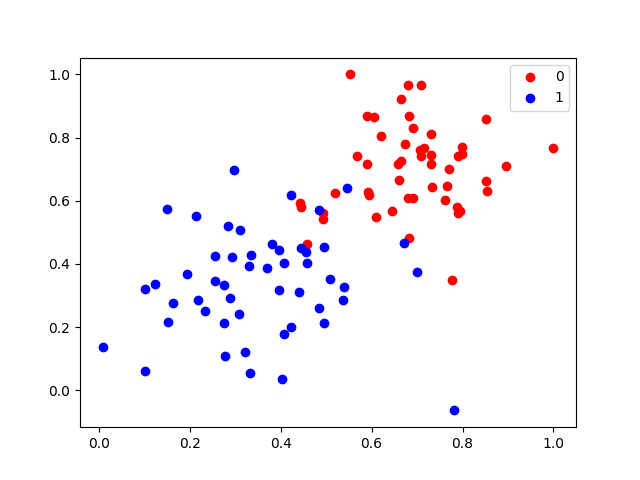

In [132]:
plt.figure()

plt.scatter(df[df["y"]==0]["w1"], df[df["y"]==0]["w2"], color="red")
plt.scatter(df[df["y"]==1]["w1"], df[df["y"]==1]["w2"], color="blue")

plt.legend(["0", "1"])

plt.show()

In [96]:
X = df.loc[:, ["w1", "w2"]]
y = df.loc[:, "y"]

In [125]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    
    for i in range(0, len(X)):
        
        pred = prediction(X.iloc[i], W, b)
        
        if pred > y.iloc[i]:
            W[0] -= (learn_rate) * X.iloc[i,0]
            W[1] -= (learn_rate) * X.iloc[i,1]
            b -= (learn_rate)

        elif pred < y.iloc[i]:
            W[0] += (learn_rate) * X.iloc[i,0]
            W[1] += (learn_rate) * X.iloc[i,1]
            b += (learn_rate)


    # Fill in code
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.005, num_epochs = 3000):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


In [126]:
result = trainPerceptronAlgorithm(X, y)

In [131]:
for i in range(0, len(result)):
    plt.plot(result[i])

# Softmax function

In [135]:
np.e

2.718281828459045

In [140]:
import numpy as np

# Write a function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.
def softmax(L):
    
    div = np.sum([np.e** l for l in L])
    
    return [np.e** l for l in L] / div

In [146]:
softmax([1,1])

array([0.5, 0.5])